# Create a wordcloud from the abstracts of papers in a Zotero collection

This code builds a word cloud from abstracts of papers in a specific collection of your Zotero library. 

It relies on three packages: 
* [Pyzotero](https://pyzotero.readthedocs.io/en/)
* [anytree](https://anytree.readthedocs.io/)
* [wordcloud](https://amueller.github.io/word_cloud/)

## Setup

In [3]:
from pyzotero import zotero
from anytree import Node, RenderTree
from anytree.importer import DictImporter
from pprint import pprint
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_library_ID():
    library_ID = input(f"What is your library ID? [return for more details]: ")
    if not library_ID:
        print("See: https://pyzotero.readthedocs.io/en/latest/#getting-started-short-version")
        get_library_ID()
    else:
        return library_ID;

def get_library_type():
    library_type = input(f"What is your library type? [return for more details]: ")
    if not library_type:
        print("See: https://pyzotero.readthedocs.io/en/latest/#getting-started-short-version")
        get_library_type()
    else:
        return library_type;
                         
def get_api_key():
    api_key = input(f"What is your library type? [return for more details]: ")
    if not api_key:
        print("See: https://pyzotero.readthedocs.io/en/latest/#getting-started-short-version")
        get_api_key()
    else:
        return api_key;

library_ID = get_library_ID()
library_type = get_library_type()
api_key = get_api_key()
                    
zot = zotero.Zotero(library_ID, library_type, api_key)

## Create a tree of Zotero collections
### Pseudocode

```
create list of my collections called my_collections
    note each collection will be a dictionary containing: {key:name,children:[],parent:key}
create empty list of collections called root
    note, this is where i'll store the nodes of the tree that don't have parents. 

def append_child_dict_to_parent(child_dict,parent_dict):
    append child_dict to value of `children` key in parent_dict

def recursive_add_child_to_parent(child_dict,parent_key,collection_list)
    for each dictionary in collection_list:
        if dictionary has the parent_key you are looking for:
            append_child_dict_to_parent(child_dict,dictionary)
        else if dictionary['children'] is not empty:
            recursive_add_child_to_parent(child_dict,parent_key,dictionary_children_list)
    remove child_dict from collection_list

for each collection in my_collections:
    if value of 'parent' key is False:
        delete the 'parent' key:value pair for this collection
        append this collection to root
    else:
        store parent value for this collection as parent_key
        delete the 'parent' key:value pair for this collection
        recursive_add_child_to_parent(collection,parent_key,my_collections)                            

for each collection in my_collections:
(this isn't the most efficient, but it works)
    if this collection is listed in root:
    print the tree for this collection
```

In [2]:
raw_collections = zot.collections()

print(f"Number of collections: {len(raw_collections)}")

Number of collections: 45


In [3]:
# create list of my collections called my_collections
# note each collection will be a dictionary containing: {key:name,children:[],parent:key}
my_collections = []

for collection in raw_collections:
    my_collections.append({collection['key']:collection['data']['name']+'-'+str(collection['meta']['numItems']), 'children':[],'parent':collection['data']['parentCollection']})

# create empty list of collections called root
# note, this is where i'll store the nodes of the tree that don't have parents.
root = []

# define function to append child_dict to value of `children` key in parent_dict
def append_child_dict_to_parent(child_dict,parent_dict):
    # Add child_dict to the list of children
    parent_dict['children'].append(child_dict)
    return;

# define recursive function to add a collection to it's parent
def recursive_add_child_to_parent(child_dict,parent_key,collection_list):
    for i in range(len(collection_list)):
        if list(collection_list[i].keys())[0] == parent_key:
            append_child_dict_to_parent(child_dict,collection_list[i])
            break
        elif len(collection_list[i]['children'])>0:
            recursive_add_child_to_parent(child_dict,parent_key,collection_list[i]['children'])
    for j in range(len(collection_list)):
        if list(collection_list[j].keys())[0] == list(child_dict.keys())[0]:
            break
    return collection_list;


for collection in my_collections:    
    # store parent value for this collection as parent_key
    parent_key = []
    parent_key = collection['parent']
    del collection['parent']
    # if value of 'parent' key is False:
    if parent_key==False:
        #print('parent==False!')
        #pprint(collection)
        # append this collection to root
        root.append(list(collection.values())[0])
    else:
        recursive_add_child_to_parent(collection,parent_key,my_collections)

# Print trees
importer = DictImporter()
for collection in my_collections:
    if list(collection.values())[0] in root:
        branch = importer.import_(collection)
        rendered_tree = str(RenderTree(branch))
        rendered_tree = rendered_tree.replace('AnyNode(','').replace(')','').replace("'",'').replace('=',': ')
        print(f"\n {rendered_tree}")


 AGK4GJ4L: Philosophy of Science-12

 QUA33RY7: Unread-32

 ZEWCLIXR: TO READ ASAP-7

 H5Q55NYV: Brain areas-1
├── QDHXRF54: Anterior Thalamic Nuclei-0
│   ├── UIDK7DWY: z_Misc-0
│   ├── P2AILCDJ: Neuropsychology-1
│   └── EX953FB4: Computation-0
├── 7JMDGIGF: OFC-0
│   ├── LF745UPI: z_Misc-0
│   ├── WXV9F8F3: Neuropsychology-7
│   └── IPAYQ4WW: Computation-2
├── T9KRMBIQ: Amygdala-0
│   ├── ESYT5UE5: z_Misc-1
│   ├── HXHKY4R4: Neuropsychology-1
│   └── 8QQ94HPN: Computation-1
├── G8CKQWTK: dlPFC-0
│   ├── DRQEDIQA: z_Misc-0
│   ├── WN6PVA9T: Computation-3
│   └── FDN8LA5S: Neuropsychology-4
└── 4V5IGZU9: Hippocampus-0
    ├── 9MY2RREC: z_Misc-10
    ├── TSYQX8G9: Neuropsychology-21
    └── 4N5Q6WHX: Computation-18

 ER7NJM6B: Hc Review-0
├── H3RJM3S4: Primate Hc Lesion-58
└── Z6S8BR85: Primate Hc Ephys-76

 PPSANMFC: Salzman Lab JC-17

 99MMX58R: Salzman-36

 NNLFBUGZ: Misc-81

 RJH7MBH5: Neurobiology of Abstraction-0
├── N6U2FUMH: 1_Analytical Methods-9
├── JV2RKM74: 0_Background-16

## Retrieve all Zotero papers from the collection of interest

This is done using the python package [Pyzotero](https://pyzotero.readthedocs.io/en/latest/). 


In [4]:
def choose_collection():
    include_collection = []
    include_collection = input(f"Copy the key (all caps, aphanumeric) of the collection that you want to use: ")
    for item in my_collections:
        if include_collection in list(item.keys()):
            collection_name = item[include_collection]
            check_collection = input(f"You chose {str(item[include_collection])}. \n Do you want to proceed? y/[n]: ")
            if check_collection.lower()=='y':
                return include_collection, collection_name
            else:
                choose_collection()

include_collection, collection_name = choose_collection()

Copy the key (all caps, aphanumeric) of the collection that you want to use:  99MMX58R
You chose Salzman-36. 
 Do you want to proceed? y/[n]:  y


In [5]:
# Eventually want to change this so that the user specifies which collection here
include_papers = []

for item in zot.everything(zot.items()):
    if 'collections' in item['data'] and include_collection in item['data']['collections']:
        #print("Found an item from the collection!")
        include_papers.append(item)
        
print(f"Number of items retrieved: {len(include_papers)}")


Number of items retrieved: 36


## Concatenate paper abstracts together and save as text file

In [6]:
concatenated_abstracts = str()

for item in include_papers:
    concatenated_abstracts = concatenated_abstracts+' '+item['data']['abstractNote']
    
if len(concatenated_abstracts)>300:
    print(f'Concatenated abstracts: 
 {concatenated_abstracts[0:300]}')
        print('...')
        print(f'{concatenated_abstracts[-301:-1]}')
else:
        print(f'Concatenated abstracts: 
 {concatenated_abstracts}')


Concatenated abstracts: 
 a...


In [7]:
# Save text file of concatenated abstracts
file = open(collection_name+'concatenated_abstracts.txt', 'wb')
pickle.dump(concatenated_abstracts, file)
file.close()

## Create a word cloud from the concatenated abstract file

For more information on customizing the word cloud, see [WordCloud on GitHub](https://github.com/amueller/word_cloud). Code here was taken from the [Minimal Example](https://github.com/amueller/word_cloud/blob/master/examples/simple.py).

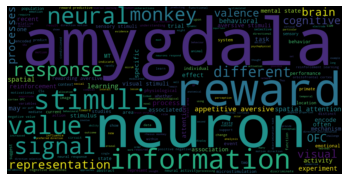

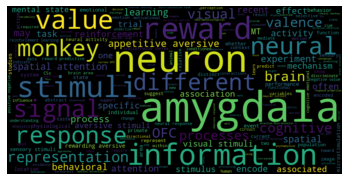

In [8]:
# Generate a word cloud image
wordcloud = WordCloud(width=1200,height=600,scale=1).generate(concatenated_abstracts)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file(collection_name+'_abstract_wordcloud.png')

# lower max_font_size
wordcloud = WordCloud(width=1200,height=600,scale=1,max_font_size=150).generate(concatenated_abstracts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(collection_name+'_abstract_wordcloud-max_150.png')